In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lets create a Regression dataset 
X_reg = tf.range(0, 1000, 5)
X_reg

<tf.Tensor: shape=(200,), dtype=int32, numpy=
array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
       260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
       325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
       390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
       455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
       520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
       585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
       650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
       715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
       780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
       845, 850, 8

In [3]:
y_reg = X_reg + 100
y_reg

<tf.Tensor: shape=(200,), dtype=int32, numpy=
array([ 100,  105,  110,  115,  120,  125,  130,  135,  140,  145,  150,
        155,  160,  165,  170,  175,  180,  185,  190,  195,  200,  205,
        210,  215,  220,  225,  230,  235,  240,  245,  250,  255,  260,
        265,  270,  275,  280,  285,  290,  295,  300,  305,  310,  315,
        320,  325,  330,  335,  340,  345,  350,  355,  360,  365,  370,
        375,  380,  385,  390,  395,  400,  405,  410,  415,  420,  425,
        430,  435,  440,  445,  450,  455,  460,  465,  470,  475,  480,
        485,  490,  495,  500,  505,  510,  515,  520,  525,  530,  535,
        540,  545,  550,  555,  560,  565,  570,  575,  580,  585,  590,
        595,  600,  605,  610,  615,  620,  625,  630,  635,  640,  645,
        650,  655,  660,  665,  670,  675,  680,  685,  690,  695,  700,
        705,  710,  715,  720,  725,  730,  735,  740,  745,  750,  755,
        760,  765,  770,  775,  780,  785,  790,  795,  800,  805,  810,
     

In [4]:
len(X_reg), len(y_reg)

(200, 200)

In [5]:
# Let's divide our dataset into training and testing data
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

In [7]:
# Let's build a model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential Api
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X_reg_train, axis= -1), y_reg_train, epochs=100, verbose=1)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 381.2673 - mae: 381.2673
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 290.6395 - mae: 290.6395
Epoch 3/100
5/5 [==============================] - 0s 748us/step - loss: 201.0602 - mae: 201.0602
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 105.7965 - mae: 105.7965
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 47.9005 - mae: 47.9005
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 74.6453 - mae: 74.6453
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 63.7784 - mae: 63.7784
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 43.4363 - mae: 43.4363
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 48.5484 - mae: 48.5484
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 42.4089 - mae: 42.4089
Epoch 11/100
5/5 [==============================]

2/2 [==============================] - 0s 2ms/step


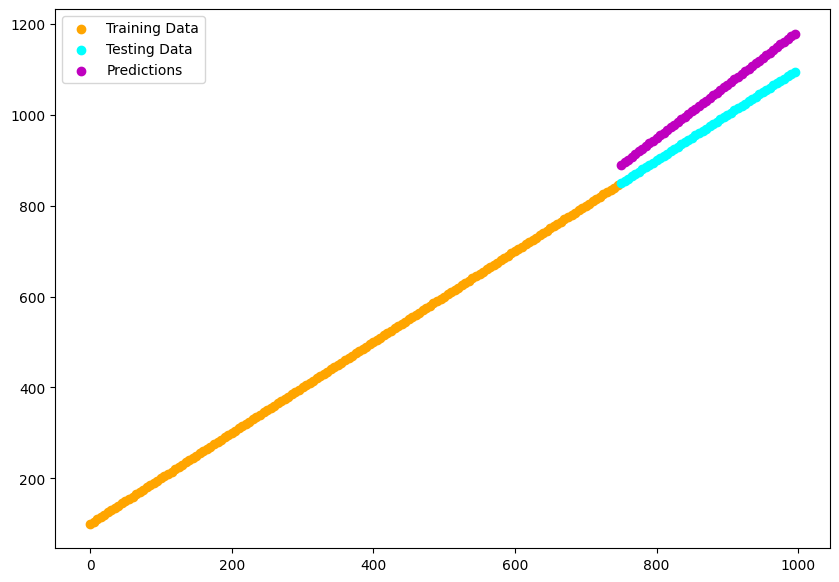

In [18]:
y_reg_preds = model.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="orange", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="cyan", label="Testing Data")
plt.scatter(X_reg_test, y_reg_preds, c="m", label="Predictions")
plt.legend()
plt.show()

In [9]:
# Now let's create dataset for classification
from sklearn.datasets import make_circles

# Set 1000 samples
n_samples = 1000

# Features and labels
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

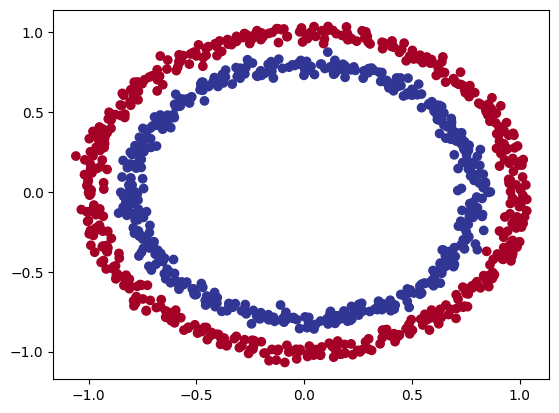

In [12]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [13]:
# Let's build a model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile a model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# 3.  Fit the model
model_1.fit(X,y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 970us/step - loss: 5.7217 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 874us/step - loss: 5.3385 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 802us/step - loss: 4.5105 - accuracy: 0.4670
Epoch 4/100
32/32 [==============================] - 0s 715us/step - loss: 4.4036 - accuracy: 0.4630
Epoch 5/100
32/32 [==============================] - 0s 714us/step - loss: 4.1898 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 724us/step - loss: 3.9179 - accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 677us/step - loss: 3.6590 - accuracy: 0.4750
Epoch 8/100
32/32 [==============================] - 0s 677us/step - loss: 3.2321 - accuracy: 0.4820
Epoch 9/100
32/32 [==============================] - 0s 678us/step - loss: 1.9633 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 710us/step - loss: 0.8022 - accura

In [14]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """
    
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X values (we are going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together
    
    # Make predictions using trained model
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if model.output_shape[-1] > 1:
        print("Doing multi-class classification...")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classsification")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
        
    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 478us/step
Doing binary classsification


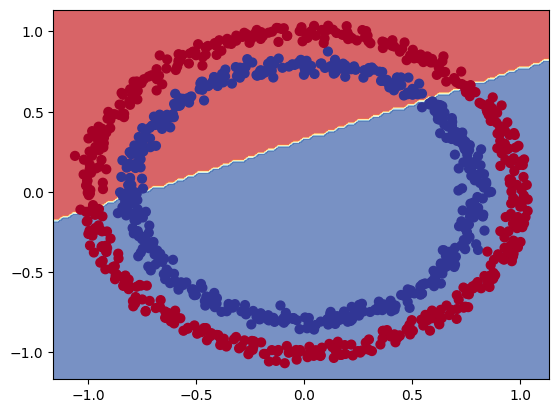

In [15]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_1,
                       X=X,
                       y=y)

### Let's try build our first neural network with a non-linear activation function

In [17]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with non-linear activation
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# 3. Fit the model
history = model_2.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 884us/step - loss: 6.2013 - accuracy: 0.4890
Epoch 2/100
32/32 [==============================] - 0s 803us/step - loss: 6.1751 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 819us/step - loss: 6.1217 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 805us/step - loss: 6.0828 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 645us/step - loss: 6.0537 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 725us/step - loss: 5.9035 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 645us/step - loss: 5.1492 - accuracy: 0.4670
Epoch 8/100
32/32 [==============================] - 0s 645us/step - loss: 4.7699 - accuracy: 0.4650
Epoch 9/100
32/32 [==============================] - 0s 709us/step - loss: 4.6746 - accuracy: 0.4620
Epoch 10/100
32/32 [==============================] - 0s 672us/step - loss: 4.5354 - accura